In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import imblearn

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [6]:
min_threshold = df['bmi'].quantile(0.001)
max_threshold = df['bmi'].quantile(0.999)
df[df['bmi']>max_threshold]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [7]:
df.dropna(inplace = True)
df.shape

(4909, 12)

In [8]:
print("Gender : ", df['gender'].unique())

print("ever_married : ", df['ever_married'].unique())

print("Work Type : ", df['work_type'].unique())

print("Residence : ", df['Residence_type'].unique())

print("Smoking : ", df['smoking_status'].unique())

Gender :  ['Male' 'Female' 'Other']
ever_married :  ['Yes' 'No']
Work Type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence :  ['Urban' 'Rural']
Smoking :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

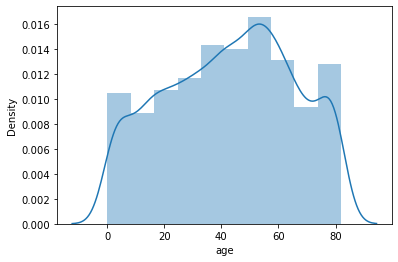

In [10]:
sns.distplot(df['age'], bins=10)  #rwidth=0.8
plt.show

In [11]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

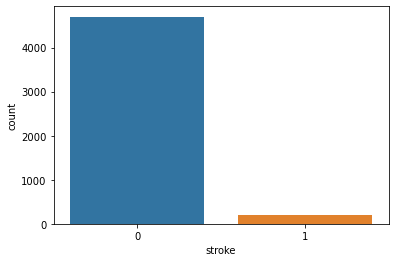

In [12]:
sns.countplot(df['stroke'], data=df)
plt.show()

## Feature Engineering

### Handle Categorical Data

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['gender']=le.fit_transform(df.gender)

df['ever_married']=le.fit_transform(df.ever_married)

df['work_type']=le.fit_transform(df.work_type)

df['Residence_type']=le.fit_transform(df.Residence_type)

df['smoking_status']=le.fit_transform(df.smoking_status)

In [15]:
df.drop(['id'], axis=1).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Handling Imbalanced Data

In [16]:
X = df.iloc[:, 1:11]
Y = df.stroke

In [17]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [18]:
Y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [19]:
print(X.shape)
print(Y.shape)

(4909, 10)
(4909,)


In [20]:
from imblearn.combine import SMOTETomek

In [21]:
stk = SMOTETomek(random_state=42)
X_res,y_res = stk.fit_resample(X,Y)

In [22]:
print(X_res.shape)
print(y_res.shape)

(9304, 10)
(9304,)


In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4700, 1: 209})
Resampled dataset shape Counter({1: 4652, 0: 4652})


# Model Creation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

In [26]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5763,0,32.413351,0,0,1,2,0,76.549847,29.687419,2
6833,0,51.663527,0,0,1,2,1,73.252731,29.171736,2
3005,0,36.000000,0,0,1,2,0,74.140000,31.200000,1
8156,0,53.694973,0,0,1,2,0,104.330796,27.612653,3
5724,0,78.000000,0,0,1,2,0,107.221448,32.612020,1


In [27]:
y_train.value_counts()

0    3274
1    3238
Name: stroke, dtype: int64

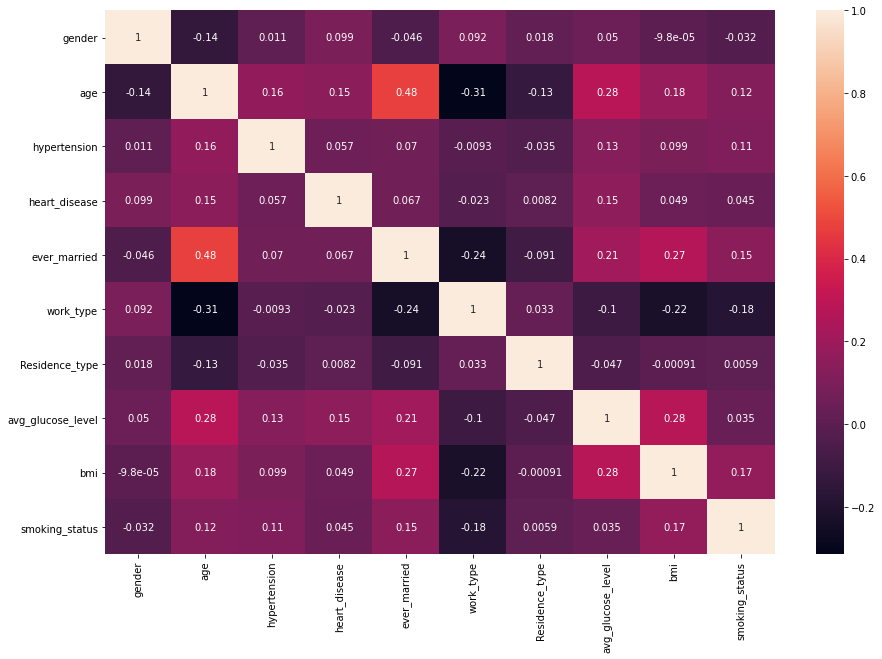

In [28]:
#get correlations of each features in dataset

corr = X_train.corr()
plt.figure(figsize=(15,10))

#plot heat map

sns.heatmap(corr, annot=True)
plt.show()

In [29]:
from sklearn.model_selection import RandomizedSearchCV

### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc_model = DecisionTreeClassifier()

In [32]:
criterion='gini', 'entropy'

splitter='best', 'random'

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [33]:
dtc_random_grid={
    'criterion' : criterion,
    'splitter' : splitter,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [34]:
dtc_random = RandomizedSearchCV(estimator = dtc_model, param_distributions = dtc_random_grid, n_iter = 10, cv = 5, return_train_score=False)

In [35]:
dtc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'splitter': ('best', 'random')})

In [36]:
dtc_random.best_params_

{'splitter': 'best',
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_depth': 20,
 'criterion': 'gini'}

In [37]:
dtc_prediction = dtc_random.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print("Accuracy Score")
print(accuracy_score(y_test, dtc_prediction))

print('*'*50)

print("Classification Report\n")
print(classification_report(y_test, dtc_prediction))

print('*'*50)

print("Confusion Matrix\n")
print(confusion_matrix(y_test, dtc_prediction))

Accuracy Score
0.8864613180515759
**************************************************
Classification Report

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1378
           1       0.88      0.89      0.89      1414

    accuracy                           0.89      2792
   macro avg       0.89      0.89      0.89      2792
weighted avg       0.89      0.89      0.89      2792

**************************************************
Confusion Matrix

[[1210  168]
 [ 149 1265]]


### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc_model = RandomForestClassifier()

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [43]:
rfc_random_grid={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [44]:
rfc_random = RandomizedSearchCV(estimator = rfc_model, param_distributions = rfc_random_grid, n_iter = 10, cv = 5, return_train_score=False)

In [45]:
rfc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [46]:
rfc_prediction = rfc_random.predict(X_test)

In [47]:
print("Accuracy Score")
print(accuracy_score(y_test, rfc_prediction))

print('*'*50)

print("Classification Report\n")
print(classification_report(y_test, rfc_prediction))

print('*'*50)

print("Confusion Matrix\n")
print(confusion_matrix(y_test, rfc_prediction))

Accuracy Score
0.9494985673352435
**************************************************
Classification Report

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1378
           1       0.93      0.97      0.95      1414

    accuracy                           0.95      2792
   macro avg       0.95      0.95      0.95      2792
weighted avg       0.95      0.95      0.95      2792

**************************************************
Confusion Matrix

[[1281   97]
 [  44 1370]]
